# Random Forest Regressor

In [93]:
df = pd.read_csv(r"C:\Users\Gk\Documents\dev\data\LinearRegression_Football_data\df_visual.csv", encoding='utf-8')

In [94]:
pd.options.display.max_columns = len(df.columns)

In [95]:
df = df.drop(['Unnamed: 0', 'nationality'], axis=1)

In [96]:
df_0 = df.groupby("player_name", as_index=None).mean()

In [97]:
df_0 = df_0.drop('player_name', axis=1)

In [98]:
df_nf = df_0.drop('follower', axis=1)

## No Follower

In [193]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

z = 10
scores_rm = np.zeros([3, z])

cv = KFold(z, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_nf)):
    df_train = df_nf.iloc[idx_train]
    df_test = df_nf.iloc[idx_test]
    
    X_train = df_train.drop('value', axis=1).astype(float)
    X_train = StandardScaler().fit_transform(X_train)
    y_train = df_train['value']
    
    model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    result = model.fit(X_train, y_train)
    
    pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
    rsquared = r2_score(df_test.value, pred)
    mse = mean_squared_error(df_test.value, pred)
    
    scores_rm[0, i] = rsquared
    scores_rm[1, i] = mse
    scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])
    
    print("R2 = {:.8f}".format(rsquared))
    print("mse = {:.8f}".format(mse))
    print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    
print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))

R2 = -0.03216240
mse = 456.47596386
R2 Score = -1.52352004
R2 = 0.47621754
mse = 325.06613126
R2 Score = -1.13097122
R2 = 0.16751814
mse = 343.87307998
R2 Score = -0.59561841
R2 = 0.18326940
mse = 209.57730842
R2 Score = -3.25534734
R2 = -0.39771817
mse = 246.51960673
R2 Score = -4.65596063
R2 = 0.38197801
mse = 665.91824209
R2 Score = -0.30482608
R2 = 0.49794580
mse = 197.97786809
R2 Score = -1.32026729
R2 = 0.26096549
mse = 547.36086052
R2 Score = -0.56311153
R2 = -0.65266966
mse = 398.69056014
R2 Score = -4.03350957
R2 = 0.41659048
mse = 224.21846771
R2 Score = -1.70359549
모델 성능 : Metrics R2 = 0.13019346371413368, R2 Score = -1.908672760540633, mse = 361.567808880121


In [194]:
pd.DataFrame(model.feature_importances_, index=df_nf.drop('value', axis=1).columns, columns=['Feature_Importances']).sort_values(by='Feature_Importances', ascending=False)

,Feature_Importances
goals_assists,0.175378
games_played,0.124835
goals_total,0.090139
shots_on,0.071355
passes_total,0.047610
dribbles_success,0.034028
penalty_won,0.030132
dribbles_attempts,0.029305
duels_won,0.028378
league,0.028254


In [195]:
model.feature_importances_

array([0.0215778 , 0.01230617, 0.00985354, 0.02585376, 0.02825368,
       0.00926342, 0.0180557 , 0.07135531, 0.09013878, 0.00084323,
       0.17537783, 0.04761009, 0.01467709, 0.02706573, 0.01594652,
       0.01576863, 0.01034383, 0.02323659, 0.02837777, 0.02930519,
       0.03402845, 0.0155493 , 0.01297461, 0.01578958, 0.00219398,
       0.00695   , 0.03013246, 0.00549281, 0.00869525, 0.0076217 ,
       0.00040594, 0.00892053, 0.0195285 , 0.00638258, 0.01270598,
       0.01258226, 0.12483541])

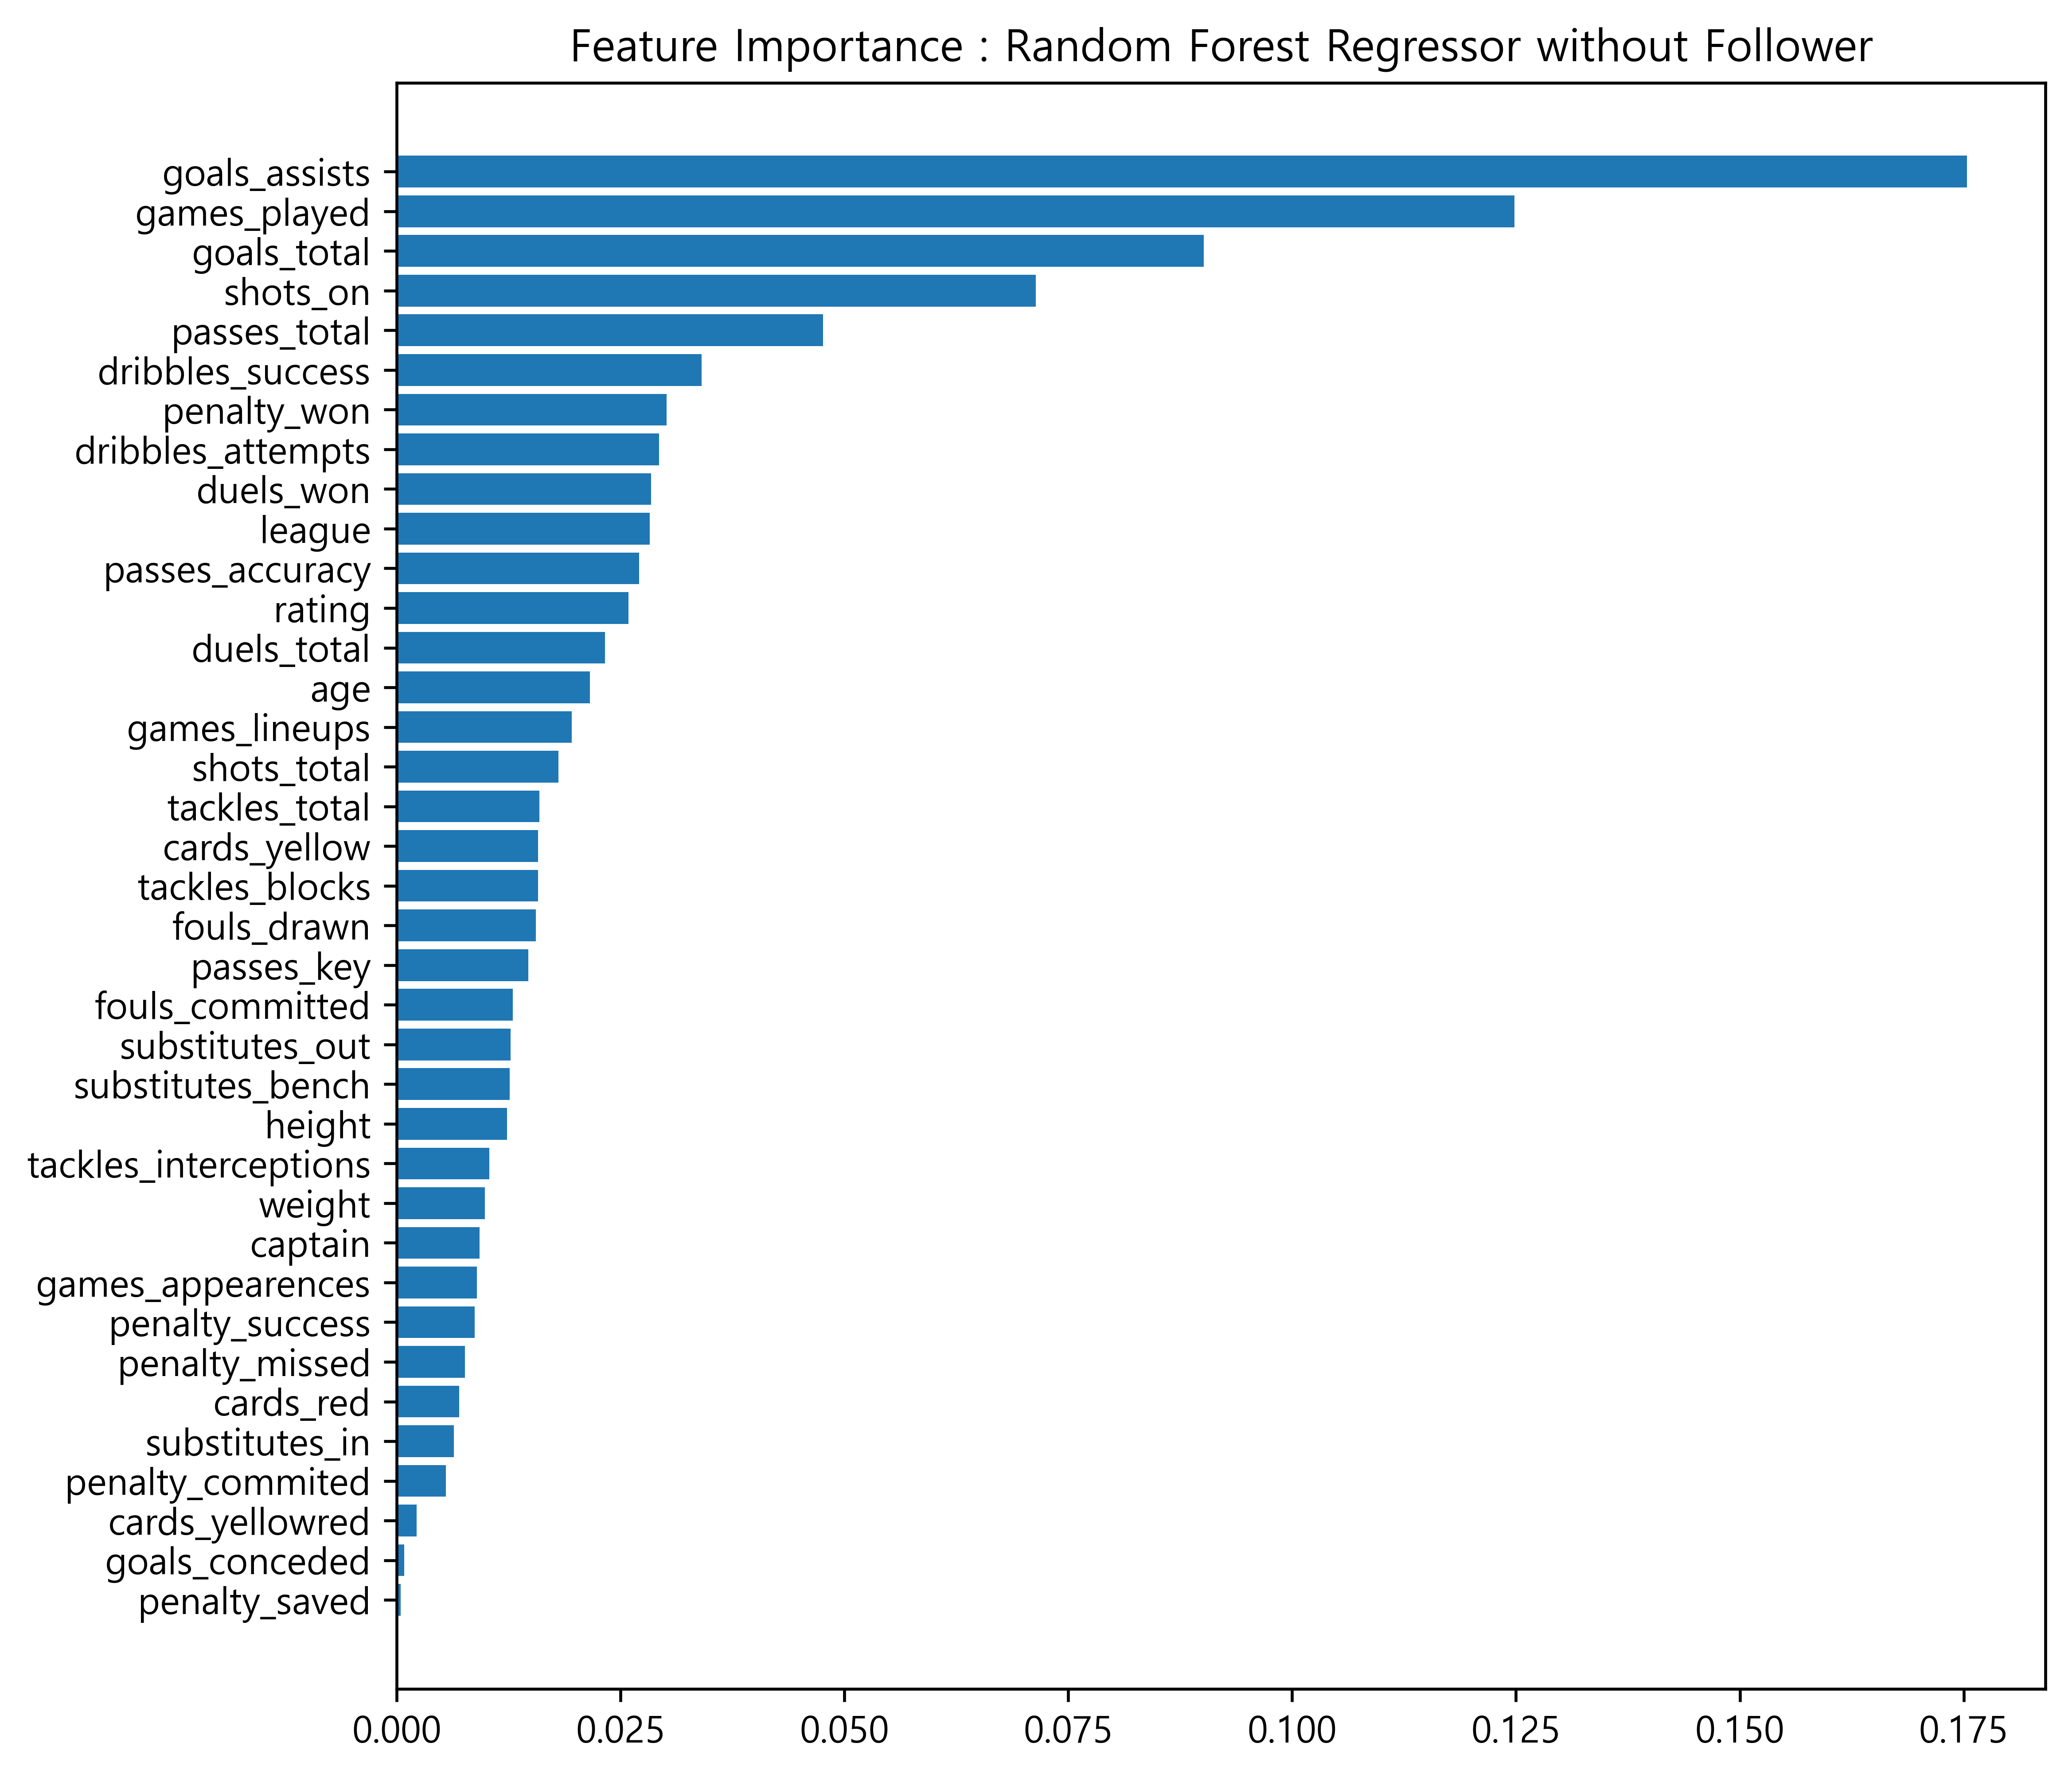

In [196]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title("Feature Importance : Random Forest Regressor without Follower")
    plt.show()

f_importances(model.feature_importances_, df_nf.drop('value', axis=1).columns)

In [197]:
df_0

,age,height,weight,rating,league,value,follower,captain,shots_total,shots_on,goals_total,goals_conceded,goals_assists,passes_total,passes_key,passes_accuracy,tackles_total,tackles_blocks,tackles_interceptions,duels_total,duels_won,dribbles_attempts,dribbles_success,fouls_drawn,fouls_committed,cards_yellow,cards_yellowred,cards_red,penalty_won,penalty_commited,penalty_success,penalty_missed,penalty_saved,games_appearences,games_lineups,substitutes_in,substitutes_out,substitutes_bench,games_played
0,25.000000,184.000000,78.000000,2.333333,53.030000,20.0,67879.0,0.0000,0.5541,0.1288,0.0129,0.0,0.0000,22.1879,0.2706,3.2985,1.2112,0.1417,0.8504,3.4403,1.6622,1.4431,1.1468,0.5283,0.7473,0.1804,0.0129,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,1.4045,0.9277,0.4767,0.2577,0.5927,77.61
1,27.000000,181.000000,72.000000,5.250000,50.142500,32.0,740918.0,0.8864,2.8169,1.0539,0.4432,0.0,0.0985,12.3215,0.9554,4.0185,0.4629,0.0985,0.2659,12.3215,5.6830,1.9305,0.9948,2.8563,1.7039,0.1083,0.0000,0.0000,0.0394,0.0000,0.0985,0.0295,0.0,1.0539,0.9948,0.0591,0.0689,0.0689,101.53
2,24.000000,188.000000,78.000000,6.000000,48.356429,24.0,601838.0,0.0000,0.3802,0.0613,0.0000,0.0,0.0123,58.0206,0.1717,13.4535,1.0302,0.3802,1.3368,6.4631,4.1943,0.1594,0.1594,0.5641,0.5887,0.0981,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,1.1160,1.0056,0.1104,0.1840,0.7604,81.54
3,25.000000,171.000000,70.000000,7.000000,49.798182,32.0,652886.0,0.0000,1.9735,0.8442,0.2282,0.0,0.2167,23.4885,1.5286,9.1604,0.7757,0.1141,0.9354,12.5827,5.0080,4.4376,2.5439,1.6085,1.6541,0.2738,0.0114,0.0114,0.0114,0.0114,0.0000,0.0000,0.0,1.5514,0.9697,0.5818,0.6731,0.6160,87.66
4,32.000000,180.000000,75.000000,4.833333,46.375000,32.0,11513791.0,0.0000,3.0824,1.1139,0.4705,0.0,0.3745,32.2451,2.2278,6.1456,0.4321,0.0480,0.4225,4.3787,1.7380,3.2456,1.6804,0.6434,0.4225,0.0960,0.0000,0.0000,0.0096,0.0192,0.0096,0.0096,0.0,1.2003,1.0755,0.1248,0.5857,0.2401,104.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,28.000000,180.000000,66.000000,3.888889,52.343333,44.0,1028085.0,0.0000,2.0280,0.7120,0.2373,0.0,0.1187,21.4995,1.4779,4.2611,1.1758,0.0216,0.3452,18.3819,8.4358,7.0011,4.0453,3.0097,1.4671,0.2050,0.0108,0.0000,0.1187,0.0000,0.0000,0.0000,0.0,1.0248,0.9924,0.0324,0.0647,0.0324,92.70
367,23.076923,188.230769,86.769231,1.615385,47.906923,24.0,57900.0,0.0000,0.4836,0.2579,0.3761,0.0,0.0107,4.1156,0.2042,2.3641,0.1397,0.0215,0.0430,0.9994,0.4298,0.3224,0.1612,0.2794,0.5803,0.1612,0.0000,0.0107,0.0000,0.0000,0.0000,0.0107,0.0,1.2143,1.0531,0.1612,0.5158,0.3116,93.06
368,32.000000,175.000000,77.000000,6.153846,48.908462,22.5,8983450.0,0.0300,2.5585,0.9794,0.2798,0.0,0.2798,38.4769,3.0082,8.6548,0.7695,0.0300,0.5297,8.1551,4.2874,4.0676,2.8383,1.6690,0.6396,0.0800,0.0000,0.0000,0.0500,0.0000,0.0500,0.0000,0.0,1.4591,1.0294,0.4297,0.5397,0.5197,100.06
369,26.000000,192.000000,84.000000,6.545455,49.124545,24.0,109000.0,0.0347,2.0141,0.7524,0.3357,0.0,0.2662,16.8654,1.2038,7.4314,0.3936,0.0695,0.3010,14.2609,6.6790,1.9562,0.9260,1.8636,1.7595,0.1042,0.0000,0.0000,0.0463,0.0000,0.0116,0.0000,0.0,1.4006,0.9492,0.4514,0.2894,0.5788,86.39


# Follower

In [198]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

z = 10
scores_rm = np.zeros([3, z])

cv = KFold(z, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_0)):
    df_train = df_0.iloc[idx_train]
    df_test = df_0.iloc[idx_test]
    
    X_train = df_train.drop('value', axis=1).astype(float)
    X_train = StandardScaler().fit_transform(X_train)
    y_train = df_train['value']
    
    model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    result = model.fit(X_train, y_train)
    
    pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
    rsquared = r2_score(df_test.value, pred)
    mse = mean_squared_error(df_test.value, pred)
    
    scores_rm[0, i] = rsquared
    scores_rm[1, i] = mse
    scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])
    
    print("R2 = {:.8f}".format(rsquared))
    print("mse = {:.8f}".format(mse))
    print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    
print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))

R2 = 0.31470539
mse = 303.07296371
R2 Score = -1.34987411
R2 = 0.46703603
mse = 330.76429371
R2 Score = -1.87363602
R2 = 0.18790500
mse = 335.45188385
R2 Score = -0.77340310
R2 = 0.13122395
mse = 222.93244120
R2 Score = -3.04859057
R2 = -1.67610220
mse = 471.99190544
R2 Score = -3.16655189
R2 = 0.39177253
mse = 655.36465228
R2 Score = -0.05772416
R2 = 0.53349863
mse = 183.95811882
R2 Score = -1.59946919
R2 = 0.42892300
mse = 422.96427676
R2 Score = -0.51847786
R2 = -0.33209333
mse = 321.35462412
R2 Score = -2.42743147
R2 = 0.37305279
mse = 240.95106098
R2 Score = -1.95552474
모델 성능 : Metrics R2 = 0.08199217987876158, R2 Score = -1.6770683102466042, mse = 348.8806220865932


In [81]:
scores_rm

array([[ 3.14705393e-01,  4.67036027e-01,  1.87905005e-01,
         1.31223946e-01, -1.67610220e+00,  3.91772532e-01,
         5.33498631e-01,  4.28923004e-01, -3.32093334e-01,
         3.73052795e-01],
       [ 3.03072964e+02,  3.30764294e+02,  3.35451884e+02,
         2.22932441e+02,  4.71991905e+02,  6.55364652e+02,
         1.83958119e+02,  4.22964277e+02,  3.21354624e+02,
         2.40951061e+02],
       [-1.34987411e+00, -1.87363602e+00, -7.73403099e-01,
        -3.04859057e+00, -3.16655189e+00, -5.77241615e-02,
        -1.59946919e+00, -5.18477861e-01, -2.42743147e+00,
        -1.95552474e+00]])

In [199]:
pd.DataFrame(model.feature_importances_, index=df_0.drop('value', axis=1).columns, columns=['Feature_Importances']).sort_values(by='Feature_Importances', ascending=False)

,Feature_Importances
follower,0.309112
goals_assists,0.092762
games_played,0.066810
age,0.046984
goals_total,0.032496
dribbles_attempts,0.031378
duels_total,0.028327
passes_total,0.026773
rating,0.024497
substitutes_bench,0.023998


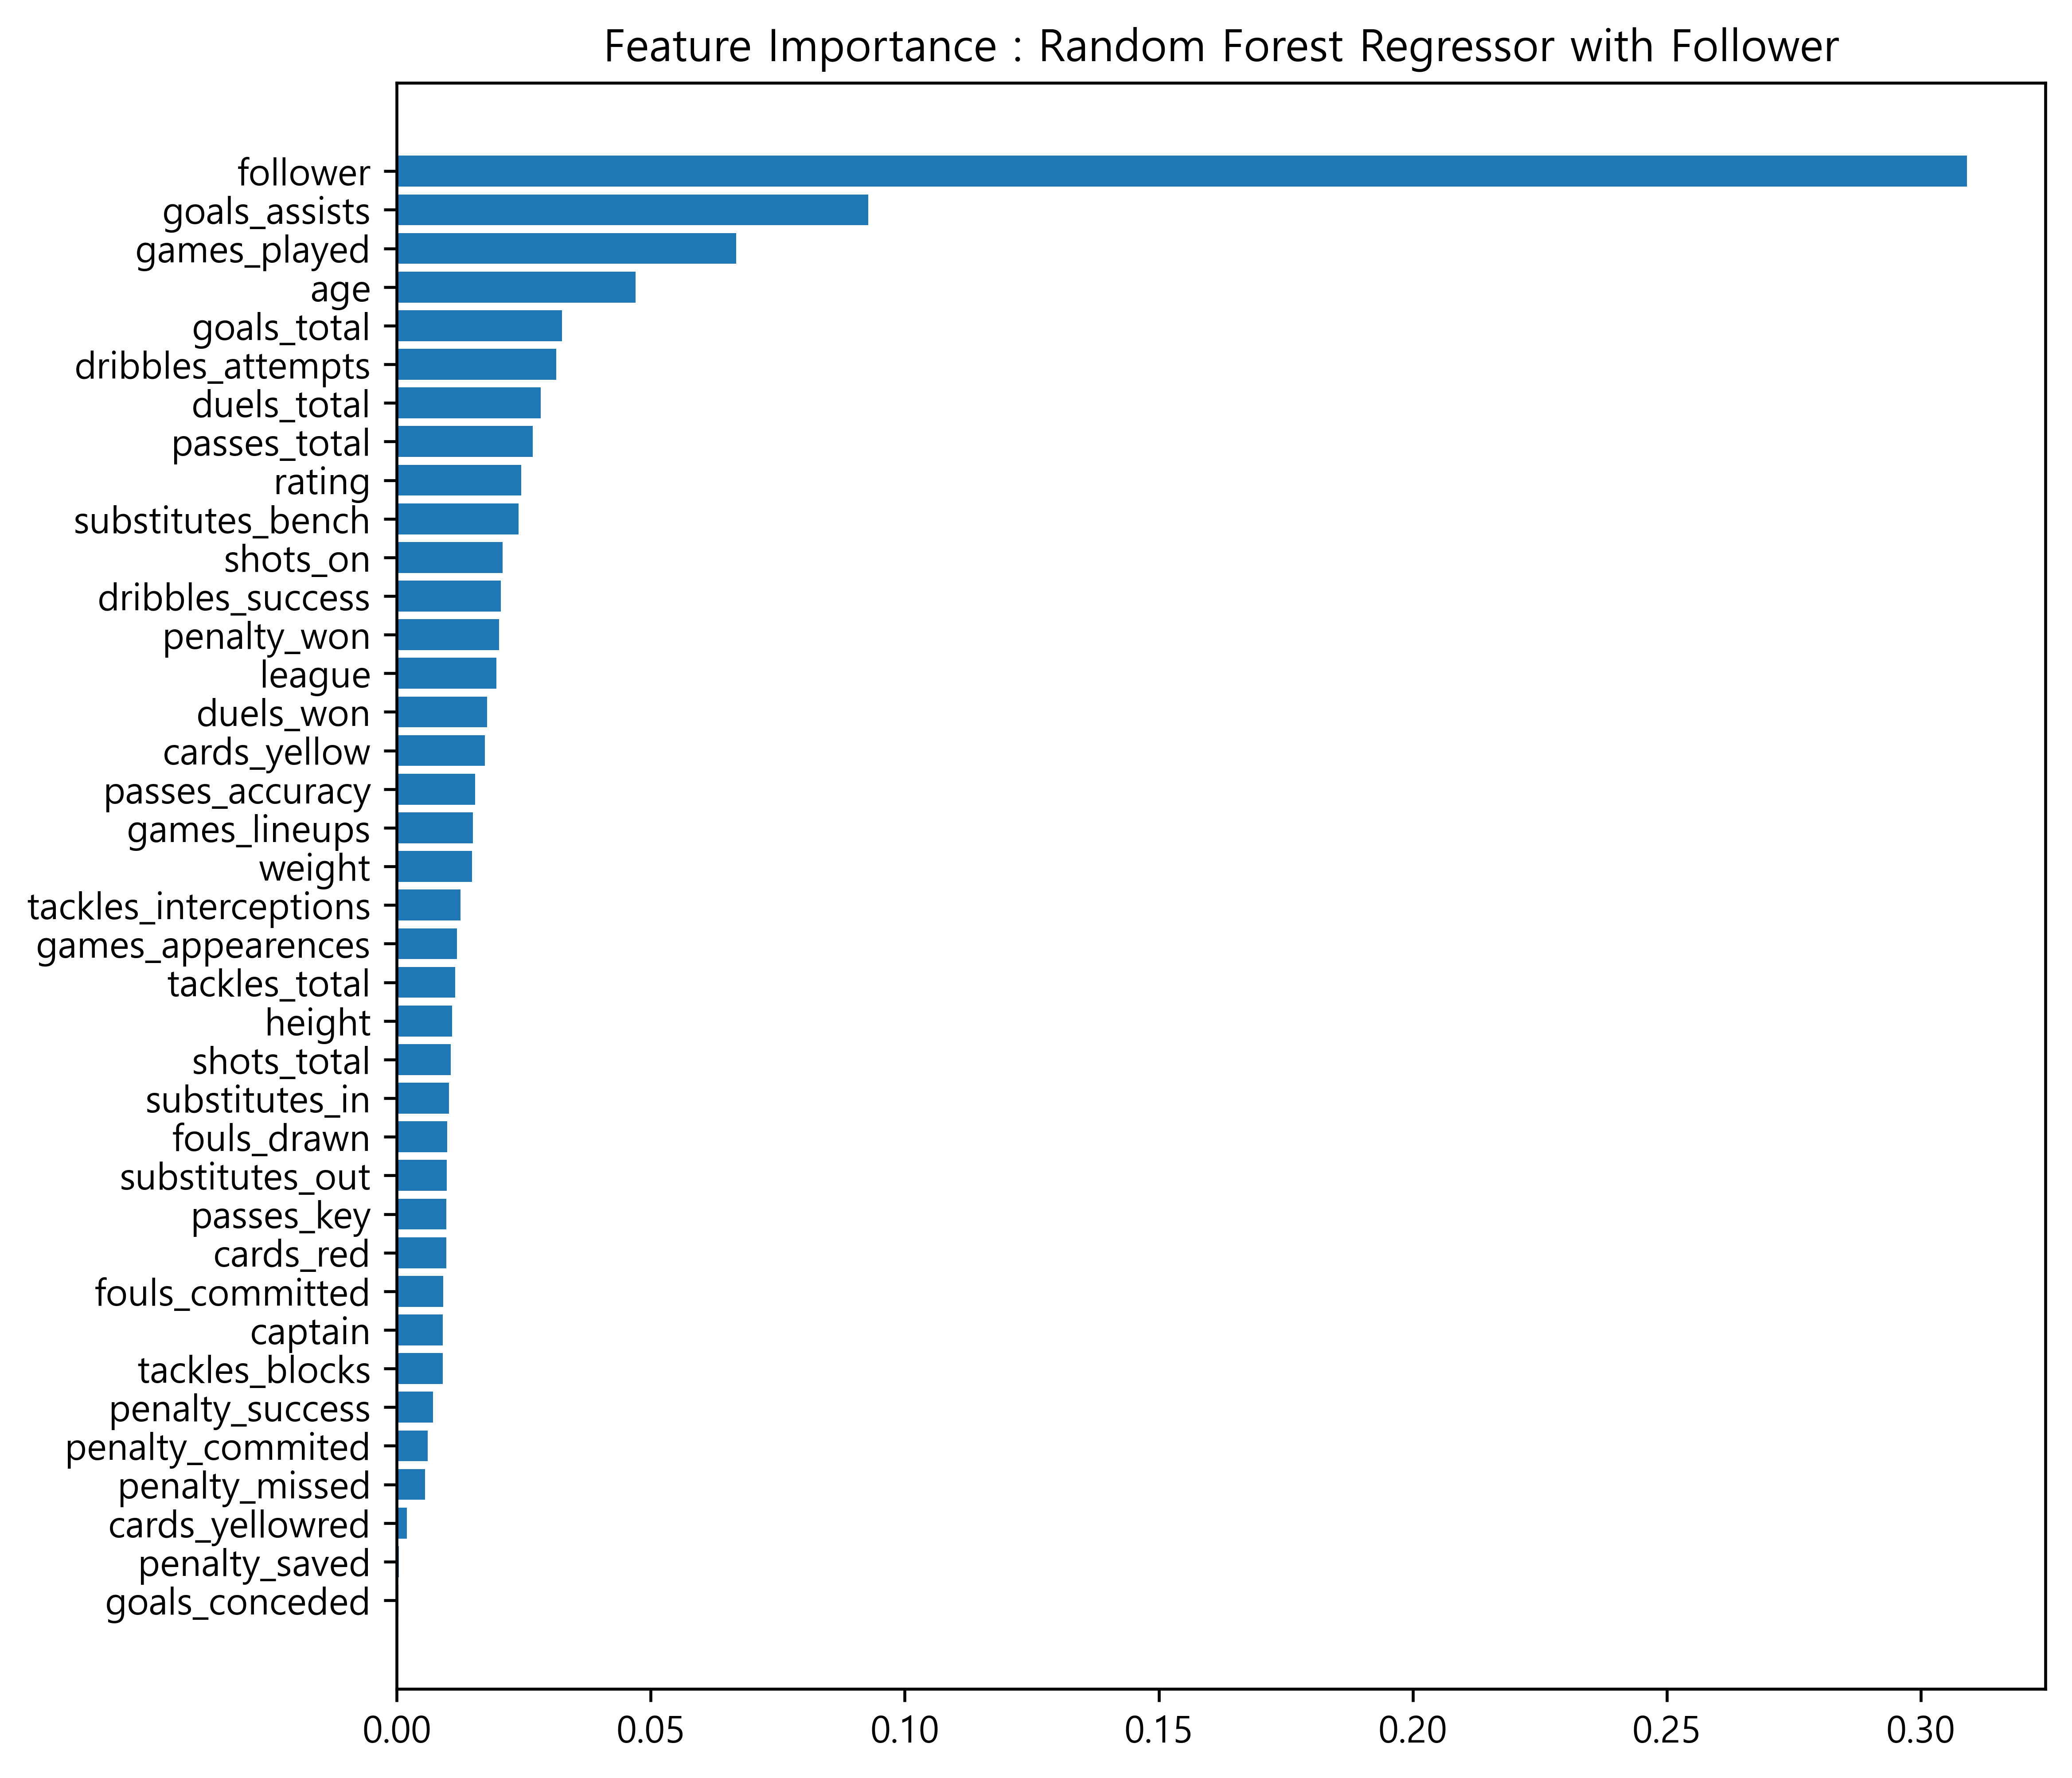

In [200]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title("Feature Importance : Random Forest Regressor with Follower")
    plt.show()

f_importances(model.feature_importances_, df_0.drop('value', axis=1).columns)

# Tuning

In [100]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

z = 10
scores_rm = np.zeros([3, z])

cv = KFold(z, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_nf)):
    df_train = df_nf.iloc[idx_train]
    df_test = df_nf.iloc[idx_test]
    
    X_train = df_train.drop('value', axis=1).astype(float)
    X_train = StandardScaler().fit_transform(X_train)
    y_train = df_train['value']
    
    model = RandomForestRegressor()
    result = model.fit(X_train, y_train)
    
    X_test = StandardScaler().fit_transform(df_test.drop('value', axis=1))
    y_test = df_test.value
    
    pred = result.predict(X_test)
    rsquared = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    
    scores_rm[0, i] = rsquared
    scores_rm[1, i] = mse
    scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])
    
    print("R2 = {:.8f}".format(rsquared))
    print("mse = {:.8f}".format(mse))
    print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    
print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))

R2 = 0.01290402
mse = 436.54524803
R2 Score = -0.94106678
R2 = 0.49068754
mse = 316.08586081
R2 Score = -0.98886904
R2 = 0.16049956
mse = 346.77224459
R2 Score = -0.73857668
R2 = 0.13860901
mse = 221.03739527
R2 Score = -3.18321990
R2 = -0.38181752
mse = 243.71516351
R2 Score = -4.03339081
R2 = 0.36095825
mse = 688.56701824
R2 Score = -0.19991068
R2 = 0.46400026
mse = 211.36380270
R2 Score = -1.45952783
R2 = 0.30260987
mse = 516.51723311
R2 Score = -0.55413994
R2 = -0.68616769
mse = 406.77163581
R2 Score = -3.90054441
R2 = 0.35880689
mse = 246.42610946
R2 Score = -2.45932469
모델 성능 : Metrics R2 = 0.12210901928379336, R2 Score = -1.8458570761574251, mse = 363.38017115398293


In [84]:
from pprint import pprint

rf = RandomForestRegressor()

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [201]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 23)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(5, 100, num = 20)]
min_samples_split = [2, 5, 10, 15, 30, 50, 75, 100]
min_samples_leaf = [1, 2, 4, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [220]:
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=random_grid, n_iter=10, 
                               cv=5, 
                               verbose=2, 
                               random_state=42,
                               n_jobs = 1
                              )

X_train, X_test, y_train, y_test = train_test_split(df_nf.drop('value', axis=1), df_nf.value, test_size=0.2)

In [221]:
model1 = rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   3.4s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.9s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   3.0s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   3.0s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   3.0s
[CV] n_estimators=550, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=550, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=550, min_samples_split=50, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


In [222]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
#     errors = np.sqrt(mean_squared_error(y_test, predictions))
    errors = mean_squared_error(y_test, predictions)
    print('Model Performance')
    print('MSE of: ', errors)
    
    return errors

In [223]:
model1.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [224]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = model1.best_estimator_
best_random.fit(X_train, y_train)
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
MSE of:  334.9993
Model Performance
MSE of:  325.423612635535


In [225]:
print('Base Accuracy: ', base_accuracy)
print('Random Accuracy: ', random_accuracy)
print('Improvement of {:0.2f}%.'.format((random_accuracy - base_accuracy)/base_accuracy))

Base Accuracy:  334.9993
Random Accuracy:  325.423612635535
Improvement of -0.03%.


Base Accuracy:  20.8117530897007
Random Accuracy:  20.44462771070915
Improvement of -0.02%.

In [226]:
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=random_grid, n_iter=10, 
                               cv=5, 
                               verbose=2, 
                               random_state=42,
                               n_jobs = 1
                              )

X_train, X_test, y_train, y_test = train_test_split(df_0.drop('value', axis=1), df_0.value, test_size=0.2)

In [227]:
model2 = rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.9s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   3.4s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   3.1s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   3.1s
[CV] n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=950, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.6s
[CV] n_estimators=550, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=550, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=550, min_samples_split=50, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


In [228]:
model2.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=90, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [229]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = model2.best_estimator_
best_random.fit(X_train, y_train)
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
MSE of:  318.5244666666667
Model Performance
MSE of:  368.5507735967085


In [230]:
print('Base Accuracy: ', base_accuracy)
print('Random Accuracy: ', random_accuracy)
print('Improvement of {:0.2f}%.'.format((random_accuracy - base_accuracy)/base_accuracy))

Base Accuracy:  318.5244666666667
Random Accuracy:  368.5507735967085
Improvement of 0.16%.


Base Accuracy:  18.38475817989819
Random Accuracy:  17.841292266584837
Improvement of -0.03%.